# Exercise Sheet 7: Logistic Regression

## Exercise 7.3

Implement	logistic	regression	with	𝐿 6 -regularization,	optimized	by	gradient	descent.	For	this,	complete	the	fit()	
and	predict()	methods	of	the	class	LogisticRegression	in	the	Jupyter	notebook.	The	fit()	method	should	compute	
the	empirical	risk	(loss)	and	the	accuracy	on	the	training	set	after	each	update	and	return	a	list	LOSS	of	all	loss	
values	and	a	list	ACCURACY	of	all	accuracy	values.	The	method	predict	should	return	predicted	labels	rather	
than	continuous	values.	

In [18]:
import numpy as np
import matplotlib.pyplot as plt

    
    
class LogisticRegression(object):

    def __init__(self, l2=0):
        self.w = None  # weights of the model
        self.learningRate = 0.1
        self.lambdaa = l2

    def loss(self, X, y):  # TODO: add arguments if needed
        """ Computes empirical risk"""
        A = np.eye(self.w.size)
        A[0] = 0

        reg = (self.lambdaa / (2 * X.size)) * self.w.dot(A).dot(self.w)
        return (-y * np.log(X) - (1 - y) * np.log(1 - X)).mean() + reg

    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def fit(self, X, y_, it=1000, verbose=1000):  # TODO: add arguments if needed
        """ Fit linear logistic regression model 
            Input:
                X:  2-dim binary Array of shape (m,n), 
                    where m is the number of examples and n is the dimension of the data
                y:  Array of length m containing the class label of each example in X
            Output: 
                LOSS:   Array or list of loss values: 
                        LOSS[i] contains the loss after the update in iteration i
                        LOSS[0] is the loss of the initial model
                ACCURACY: Array or list of accuracy values: 
        """
        LOSS = []
        ACCURACY = []

        m, n = X.shape

        X_ = np.ones((m, n + 1))
        X_[:, 1:] = X
        
        y = y_.copy()
        self.classes = np.unique(y)

        if self.classes.size != 2:
            print("Needs two classes!!!!")
            return None, None

        y[y_ == self.classes[0]] = 1
        y[y_ == self.classes[1]] = 0

        self.w = np.zeros(n + 1)

        A = np.eye(n + 1)
        A[0] = 0

        for i in range(it):
            reg = (self.lambdaa / m) * self.w.dot(A)
            p = self.sigmoid(X_.dot(self.w))
            gradient = X_.T.dot(p - y) / m
            self.w -= self.learningRate * (gradient + reg)
            predict = self.predict(X)

            LOSS.append(self.loss(self.sigmoid(X_.dot(self.w)), y))
            ACCURACY.append((y_ == predict).mean())
            
            if i % verbose == 0:
                print(i)

        LOSS = np.array(LOSS).reshape(len(LOSS))
        ACCURACY = np.array(ACCURACY).reshape(len(ACCURACY))
        return LOSS, ACCURACY
    
    def predict_prob(self, X):
        m, n = X.shape
        X_ = np.ones((m, n + 1))
        X_[:, 1:] = X
        y_pred = self.sigmoid(X_.dot(self.w))
        return y_pred
    
    def predict(self, X):
        """ compute predicted labels
            Input:
                X:         Data matrix, format as described in fit()
            Output: 
                y_pred:    list of predicted labels
                
        """
        m, n = X.shape
        X_ = np.ones((m, n + 1))
        X_[:, 1:] = X
        y_pred = self.sigmoid(X_.dot(self.w))
        y_pred_ = y_pred.copy()
        y_pred_[y_pred >= 0.5] = self.classes[0]
        y_pred_[y_pred < 0.5] = self.classes[1]
        return y_pred_

    def evaluate(self, X, y):
        """ Evaluates the fitted model on test data X,y
            Input:
                X: Data matrix, format as described in fit()
                y: Labels, format as described in fit()
            Returns:
                acc: Accuracy
        """
        prediction = self.predict(X)
        acc = sum(prediction == y) / len(y)
        return acc

    ### TODO: Exercise 7.5.2  ###
    def most_sure(self, X, y):
        """ Finds and plots the example in X for which the classifier is most sure
        """
        predict = self.predict_prob(X)
        probs = np.abs(0.5 - predict).argmax()
        probability = predict[probs]
        y_true = y[probs]
        y_pred = self.predict(X)[probs]
        x = X[probs]
        print('Most sure prediction: probability = ', probability, '   true label = ', y_true, '   predicted label = ',
              y_pred)
        plot_mnist(x)

    ### TODO: Exercise 7.5.2  ### 
    def least_sure(self, X, y):
        """ Finds and plots the example in X for which the classifier is least sure (most unsure).
        """
        predict = self.predict_prob(X)
        probs = np.abs(0.5 - predict).argmin()
        probability = predict[probs]
        y_true = y[probs]
        y_pred = self.predict(X)[probs]
        x = X[probs]
        print('Least sure prediction: probability = ', probability, '   true label = ', y_true, '   predicted label = ',
              y_pred)
        plot_mnist(x)


## Exercise 7.4

The	method	get_toy_data()	generates	two	linearly	separable	classes.	Fit	a	logistic	regression	model	without	
regularization	and	one	with	regularization	and	add	the	decision	boundaries	to	the	scatter	plot.	Try	to	
minimize	the	training	loss	as	much	as	possible.	Plot	the	LOSS	and	ACCURACY	curves	for	both	models.	Discuss	
your	results.

0
1000
2000
3000
4000
0
1000
2000
3000
4000


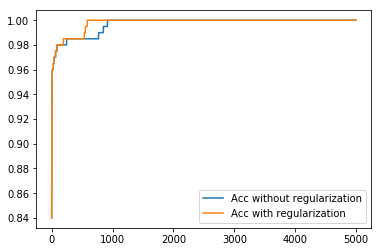

1.0


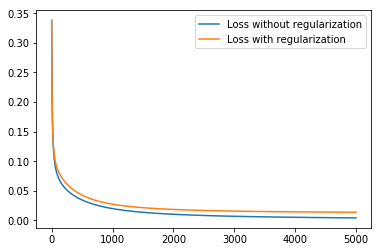

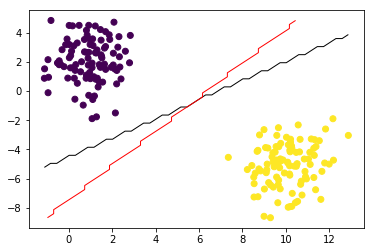

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def get_toy_data():
    n = 100
    X1 = np.random.multivariate_normal([1,2],[[1, 0],[0, 2]], n)
    X2 = np.random.multivariate_normal([10,-5],[[1, 0.2],[0.2, 2]], n)
    X = np.concatenate((X1,X2),axis=0)
    y = np.array([0]*n + [1]*n)
    return X,y

X,y = get_toy_data()

x1_m, x1_x = X[:, 0].min(), X[:, 0].max(),
x2_m, x2_x = X[:, 1].min(), X[:, 1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_m, x1_x), np.linspace(x2_m, x2_x))
grid = np.c_[xx1.ravel(), xx2.ravel()]


it = 5000
classifier = LogisticRegression()

loss, acc = classifier.fit(X, y, it=it)
probs1 = classifier.predict(grid).reshape(xx1.shape)

classifier.lambdaa = 3
lossw, accw = classifier.fit(X, y, it=it)
probs2 = classifier.predict(grid).reshape(xx1.shape)

# plot ACCURACY and LOSS curves for both models
plt.figure()
plt.plot(range(it), acc, label="Acc without regularization")
plt.plot(range(it), accw, label="Acc with regularization")
plt.legend()
plt.show()

plt.figure()
plt.plot(range(it), loss, label="Loss without regularization")
plt.plot(range(it), lossw, label="Loss with regularization")
plt.legend()
plt.show()

# add decision boundaries of both classifiers to the plot

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.contour(xx1, xx2, probs1, [0.5], linewidths=1, colors='black')
plt.contour(xx1, xx2, probs2, [0.5], linewidths=1, colors='red')
plt.show()

plt.show()


## Exercise 7.5

Apply	logistic	regression	to	two	(arbitrary)	classes	of	the	MNIST	Dataset.	Use	the	function	
load_mnist()	to	load	two	classes	from	the	MNIST	dataset.	Train	the	model	on	the	training	set,	use	the	
LOSS	curve	to	check	whether	gradient	descent	works	properly.	Plot	the	LOSS	and	ACCURACY	curves.	
Compute	accuracy	on	the	training	and	on	the	test	sets.	Discuss	your	results.	Hint:	Most	of	this	is	
already	given	in	the	template!	You	only	have	to	define	the	fitting	parameters.	

Find	and	plot	one	test	example	each	where	the	trained	classifier	is	(a)	most	sure	(b)	most	unsure.	
Hint:	You	only	have	to	implement	the	class	methods	most_sure(),	most_unsure().	

Plot	the	weights	of	the	fitted	model	as	image.	Use	the	plot_mnist()	function	for	this.	Interpret	the	
image.

[8 3]
0
50
100
150
200
250


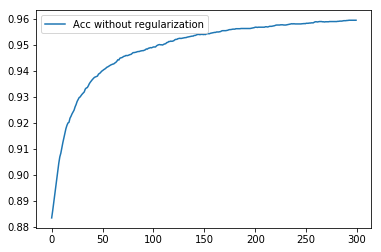

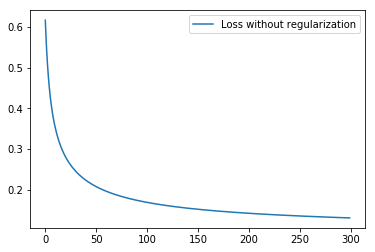

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def load_mnist(path, classes = range(10)):
    """ Load data from mnist dataset stored in csv format. 
        Rows correspond to examples.
        First column are the labels, all other columns constitute the data.
        Each image is 28 x 28 stored as 784-dim. vector .
        Input: 
            path      path to csv file
            classes   list of classes to extract
        Output:
            data      design matrix holding the images
            labels    array of corresponding labels
    
    """
    df = pd.read_csv(path, header=None)
    lab = np.array(df.iloc[:,0])
    dat = np.array(df.iloc[:,1:])

    ind = [c in classes for c in lab]

    data = dat[ind,:]
    labels = lab[ind]

    return data,labels

def plot_mnist(x, l=True):
    """ Plot an mnist image.
        Input:
            x      784-dim. vector representing a grayscale image of size 28 x 28.
    """
    img = np.reshape(x,(28,28))
    ret = plt.imshow(img,cmap='gray')
    if l: plt.show()
    return ret

from random import randint

l = np.random.randint(9, size=(2))
print(l)

# load data
data_test, labels_test = load_mnist('mnist_test.csv', classes = [l[0],l[1]])
data_train, labels_train = load_mnist('mnist_train.csv', classes = [l[0],l[1]])

# TODO: further steps if needed
test = data_test/255
train = data_train/255

it = 300

classifier = LogisticRegression()
loss, acc = classifier.fit(train, labels_train, it=it, verbose=50)

plt.figure()
plt.plot(range(it), acc, label="Acc without regularization")
plt.legend()
plt.show()

plt.figure()
plt.plot(range(it), loss, label="Loss without regularization")
plt.legend()
plt.show()


Normalized confusion matrix
[[0.99471366 0.00528634]
 [0.02140078 0.97859922]]


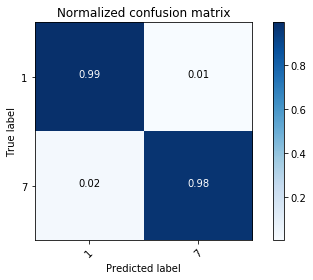

In [58]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

y_pred = classifier.predict(data_test)
cnf_matrix = confusion_matrix(labels_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=l, normalize=True,
                      title='Normalized confusion matrix')

Test Accuracy = 0.9657258064516129
Train Accuracy = 0.9591053246536472
Most sure prediction: probability =  1.0    true label =  3    predicted label =  3.0


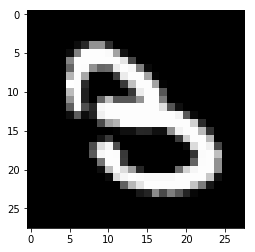

Least sure prediction: probability =  0.5957582689079555    true label =  8    predicted label =  3.0


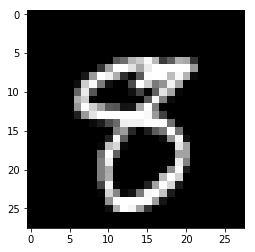

In [62]:
acc_test = classifier.evaluate(data_test,labels_test)
acc_train = classifier.evaluate(data_train,labels_train)
print('Test Accuracy =',acc_test)
print('Train Accuracy =',acc_train)

classifier.most_sure(data_test,labels_test)
classifier.least_sure(data_test,labels_test)

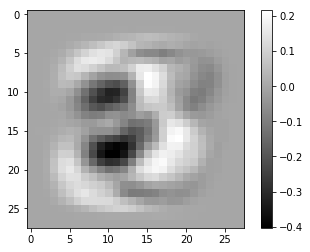

In [63]:
# Exercise 7.5.3
w = classifier.w[1:]
# TODO: plot weights as image using plot_mnist()
plot_mnist(w,False)
plt.colorbar()